## Visualising Food by Super Group using a network Graph

Import Library

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
from dash import dcc
from dash import html
import matplotlib.cm as cm
import squarify

Import Dataset

In [12]:
pd.set_option('display.max_rows', None)
Retail = pd.read_csv(r'C:\Users\medekar\Desktop\Product_Weight_Project\Data\Processed\ReducedwithWeights\dataproduct.csv', index_col=0)
Retail.head()

,Food Code,Food Name,Group,Super Group,Sale format(s),Source,Similarity Score,Weight,PurEqualCon,Portion Consumed
0,17-208,"beer, bitter, best, premium, 1 pint",QA,Alcoholic beverages,pint,NaN,0.828152,574g,Y,1 pint
1,NaN,"beer, bitter, best, premium, bottle",QA,Alcoholic beverages,beer bottle,NaN,0.792934,250/300g,Y,bottle
2,NaN,"beer, bitter, best, premium, small can",QA,Alcoholic beverages,small can,NaN,0.782098,333g,Y,small can
3,NaN,"beer, bitter, best, premium, large can",QA,Alcoholic beverages,large can,NaN,0.785473,444g,Y,large can
4,17-224,cider,QC,Alcoholic beverages,"can, can multipack, bottle, bottle multipack",NaN,0.000000,NaN,NaN,NaN


                                            Creating and Visualising Graph

### Food Products in Super Group

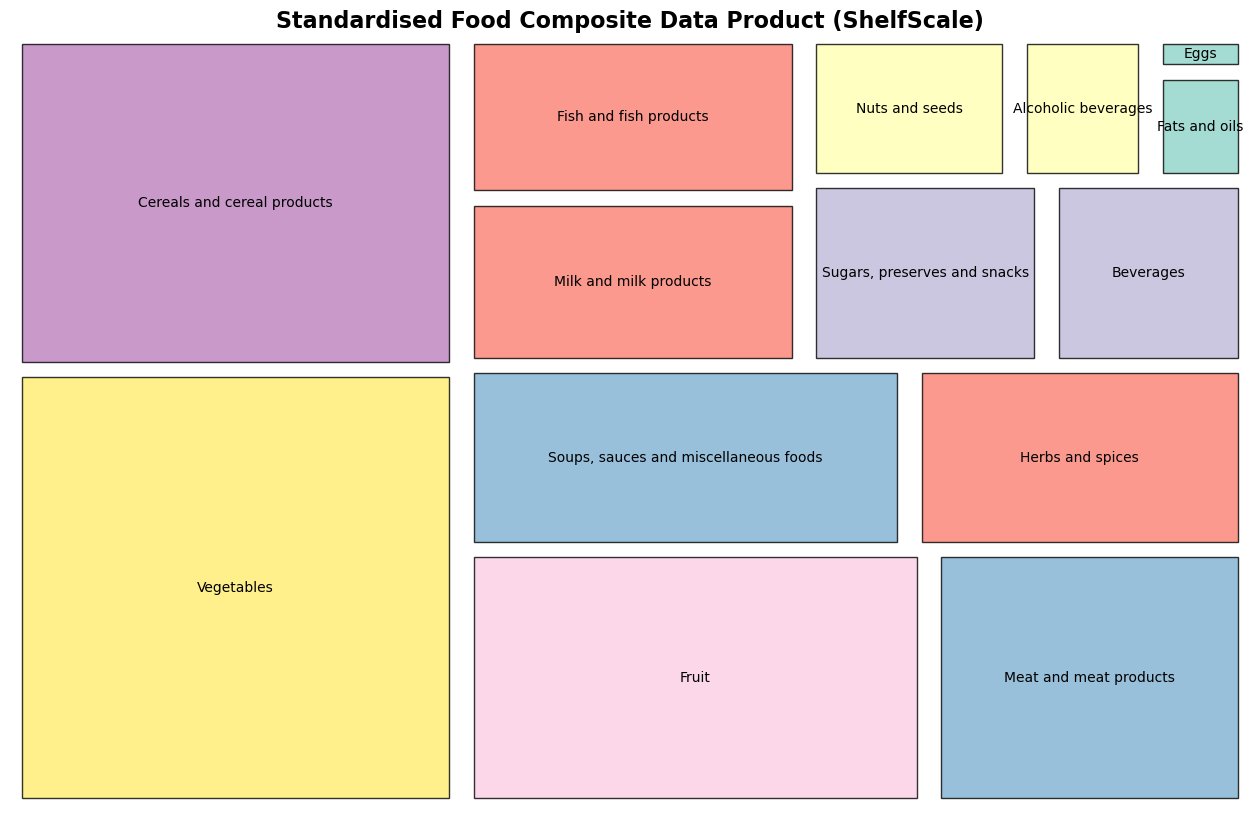

In [13]:
# Count the occurrences of each super group
super_group_counts = Retail['Super Group'].value_counts()

# Create labels and sizes for the treemap
labels = super_group_counts.index
sizes = super_group_counts.values

# Custom colors for the treemap (replace with your preferred colors)
# For shading one color, we'll use the 'viridis' colormap from Matplotlib
cmap = cm.Set3
normalize = plt.Normalize(vmin=sizes.min(), vmax=sizes.max())
colors = [cmap(normalize(value)) for value in sizes]

# Add box outlines
plt.figure(figsize=(16, 10))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, linewidth=1, edgecolor='black', pad=True)

# Add title
plt.title('Standardised Food Composite Data Product (ShelfScale)', fontsize=16, fontweight='bold')


# Remove axes
plt.axis('off')

# Show the plot
plt.show()


                                            Creating an interactive Version

In [14]:
# Count the occurrences of each super group
super_group_counts = Retail['Super Group'].value_counts()

# Create labels and sizes for the treemap
labels = super_group_counts.index
sizes = super_group_counts.values

# Custom colors for the treemap (replace with your preferred colors)
cmap = cm.Set3
colors = [f'rgb{tuple(int(255 * x) for x in cmap(i)[:3])}' for i in range(len(labels))]

# Create the Plotly treemap
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=[''] * len(labels),
    values=sizes,
    customdata=[f"{size} products" for size in sizes],  # Data for hover info
    texttemplate="%{label}<br>%{customdata}",
    textfont=dict(size=15, family="Arial"),
    marker=dict(
        colors=colors,
        line=dict(width=0.5, color='black')
    )
))

# Customize the layout
fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10)
)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define loading indicator component with CSS styling
loading_indicator = html.Div(
    html.Div([
        dcc.Loading(
            html.Div([
                html.Div("Loading...", className="loading-text"),
                html.Div(className="loading-spinner")
            ]),
            type="default",
            color="#119DFF",
        ),
    ], className="loading-container")
)

# Define the app layout
app.layout = html.Div([
    html.Div([
        html.H1('ShelfScale Dashboard', className='header'),
        html.P("Click on a treemap box to see more details:", className='intro-text'),
    ], className='header-container'),
    html.Div([
        dcc.Graph(id='treemap', figure=fig, config={'displayModeBar': False}),
        html.Div(id='bar-chart-container', className='background-image', style={
            'background-image': 'url(r"C:/Users/medekar/Desktop/Product_Weight_Project/Dashboard/SscaleDB.png")',
            'background-size': 'cover',
        })  # Placeholder for the bar-chart
    ], className='treemap-container'),
    html.A(id='download-link', children='Download Table', href='', target='_blank'),
    html.Div([
        html.Div(id='table-container', className='table-container', children=[
            html.Table(id='details-table', className='details-table')
        ]),   
    ], className='table-container'),
])


# When I click a box I want the information of the box to show in expanded box with the option to download

In [15]:
from dash.dependencies import Input, Output
import plotly.express as px

# Callback to update the table when a treemap box is clicked
@app.callback(
    Output('table-container', 'children'),
    [Input('treemap', 'clickData')]
)
def update_table(clickData):
    if not clickData:
        return html.Div()

    super_group = clickData['points'][0]['label']
    products = Retail[Retail['Super Group'] == super_group]

    table = html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in products.columns])
        ),
        html.Tbody([
            html.Tr([html.Td(products.iloc[i][col]) for col in products.columns])
            for i in range(len(products))
        ])
    ])
    
    return table
@app.callback(
    Output('bar-chart-container', 'children'),
    Input('treemap', 'clickData')
)
def update_bar_chart(click_data):
    if click_data is None:
        return None

    selected_super_group = click_data['points'][0]['label']
    # Replace 'Retail' with your actual dataframe name and 'Value' with the appropriate column for the bar chart data
    bar_data = Retail[Retail['Super Group'] == selected_super_group]['Weight'].count()

    bar_fig = px.bar(
        x=bar_data.index,
        y=bar_data,
        labels={'x': 'Super Group', 'y': 'Weight'},
        title=f'Bar Chart for {selected_super_group}',
    )
    
    bar_fig.update_layout(
        xaxis_title='Super Group',
        yaxis_title='Weight',
    )

    return dcc.Graph(id='bar-chart', figure=bar_fig)  # Return the bar-chart figure

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
AttributeError: 'numpy.int64' object has no attribute 'index'

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
AttributeError: 'numpy.int64' object has no attribute 'index'

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
AttributeError: 'numpy.int64' object has no attribute 'index'

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
AttributeError: 'numpy.int64' object has no attribute 'index'

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent